<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-1:-Full-Series-of-Publications" data-toc-modified-id="Model-1:-Full-Series-of-Publications-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model 1: Full Series of Publications</a></span><ul class="toc-item"><li><span><a href="#LDA-Modelling:" data-toc-modified-id="LDA-Modelling:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>LDA Modelling:</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Model-1-with-pdf2txt" data-toc-modified-id="Model-1-with-pdf2txt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model 1 with <code>pdf2txt</code></a></span><ul class="toc-item"><li><span><a href="#LDA-Modelling" data-toc-modified-id="LDA-Modelling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LDA Modelling</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Model-2:-2012-2017-LDA" data-toc-modified-id="Model-2:-2012-2017-LDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model 2: 2012-2017 LDA</a></span><ul class="toc-item"><li><span><a href="#LDA-Modelling" data-toc-modified-id="LDA-Modelling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LDA Modelling</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Model-2-with-pdf2txt" data-toc-modified-id="Model-2-with-pdf2txt-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model 2 with <code>pdf2txt</code></a></span><ul class="toc-item"><li><span><a href="#LDA-Modelling" data-toc-modified-id="LDA-Modelling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LDA Modelling</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualisation</a></span></li></ul></li><li><span><a href="#Misc" data-toc-modified-id="Misc-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Misc</a></span></li></ul></div>

In [1]:
import cPickle as pkl
import pandas as pd
from numpy.random import RandomState
rng = RandomState(93748573)

In [2]:
from gensim import models
from gensim.corpora import Dictionary
# Use coherence model to measure the LDA models generated
from gensim.models.coherencemodel import CoherenceModel

In [3]:
# ref: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/Gensim%20Newsgroup.ipynb
import pyLDAvis.gensim as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

In [6]:
from IPython.display import HTML

<b>Setup</b>

In [4]:
# Building on the preprocess_pubs from the previous notebook:
pub_toks = pkl.load(open('../data/pub_toks.pkl'))

In [5]:
pub_toks.head(3)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration in this c...,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,comprehension syntax the syntax of comprehensi...,"[comprehens, syntax, syntax, comprehens, close..."


<b>LDA with pdf2txt</b>

In [7]:
pub_pdf2txt = pd.read_pickle('../data/pub_toks_w_pdf2txt.pkl')

In [8]:
pub_pdf2txt.head(3)

,year,title,abstract,publications,pdf2txt,combined,toks
pub_id,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",,query processing in data integration. in this ...,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,comprehension syntax,the syntax of comprehensions is very close to ...,sigmod record,Comprehension Syntax\n \n Citation for publish...,comprehension syntax. the syntax of comprehens...,"[comprehens, syntax, syntax, comprehens, close..."


# Model 1: Full Series of Publications

From `preprocess_pubs.ipynb` in [infnet-scrapper](../infnet-scrapper/notebooks/preprocess_pubs.ipynb), we generate tokens for our publications.

Now, we use these tokens to create a dictionary, corpus, and topic models for each of the documents

In [6]:
toks = pub_toks.summary_toks.tolist() # List of List

In [7]:
# Create the dictionary mapping:
dictionary = Dictionary(toks)

# ignore words that appear in less than 20 documents or more than 10% documents
dictionary.filter_extremes(no_below=20, no_above=0.1) 
dictionary.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary.doc2bow(row.summary_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

In [8]:
pub_toks.head(2)

,year,title,abstract,publications,summary,summary_toks,bow
pub_id,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[balloon, stabil, analysi, jet, hmode, dischar...","[(141, 1), (206, 2), (301, 1), (368, 1), (440,..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,query processing in data integration,in this chapter we illustrate the main techniq...,"data exchange, integration, and streams,dagstu...",query processing in data integration in this c...,"[queri, process, data, integr, chapter, illust...","[(7, 1), (125, 2), (212, 1), (234, 1), (293, 2..."


In [9]:
# Generate a corpus based on the tokens, which we will be using later
corpus = pub_toks.bow.tolist()

In [10]:
# Save the dictionary:
dictionary.save('../data/fullpub/dictionary_fullpub.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(pub_toks, open('../data/fullpub/pub_toks_wBOW_fullpub.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus, open('../data/fullpub/corpus_fullpub.pkl', 'wb'), -1)

## LDA Modelling:
Creates the topic model using the corpus, dictionary and index created.

- Iterations :: number of times each documents is seen in the E-step in online learning
- passes     :: number of times the corpus is seen

In [11]:
num_topics = 20

In [ ]:
# This is the fullpub LDA model.
lda = models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

In [13]:
# Save the model:
lda.save('../data/fullpub/fullpub.ldamodel')

## Evaluate the model

In [15]:
cm = CoherenceModel(model=lda,texts=toks, dictionary=dictionary, coherence='c_v')

In [16]:
print cm.get_coherence()

0.521323377197


## Visualisation

In [21]:
vis_data = gensimvis.prepare(lda, corpus, dictionary, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [22]:
pyLDAvis.display(vis_data)

In [23]:
# save in html for viewing
pyLDAvis.save_html(vis_data,open('ldavis.fullpub.html','w'))

In [4]:
HTML("./ldavis.fullpub.html")

# Model 1 with `pdf2txt`

In [9]:
toks = pub_pdf2txt.toks.tolist()

In [10]:
# Create the dictionary mapping:
dictionary_pdf2txt = Dictionary(toks)

# ignore words that appear in less than 20 documents or more than 10% documents
dictionary_pdf2txt.filter_extremes(no_below=20, no_above=0.1) 
dictionary_pdf2txt.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary_pdf2txt.doc2bow(row.toks)
pub_pdf2txt['bow'] = pub_pdf2txt.apply(bowified, axis=1)

In [11]:
# Generate a corpus based on the tokens, which we will be using later
corpus_pdf2txt_full = pub_pdf2txt.bow.tolist()

In [16]:
# Save the dictionary:
dictionary_pdf2txt.save('../data/fullpub_pdf2txt/dictionary_pdf2txt.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(pub_pdf2txt, open('../data/fullpub_pdf2txt/pub_toks_wBOW_pdf2txt.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_pdf2txt_full, open('../data/fullpub_pdf2txt/corpus_pdf2txt.pkl', 'wb'), -1)

## LDA Modelling

In [12]:
num_topics = 20

In [ ]:
# This is the fullpub LDA model.
lda_pdf2txt = models.ldamodel.LdaModel(
    corpus=corpus_pdf2txt_full,
    id2word=dictionary_pdf2txt,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

In [17]:
# Save the model:
lda_pdf2txt.save('../data/fullpub_pdf2txt/fullpub_pdf2txt.ldamodel')

## Evaluate the model

In [18]:
cm = CoherenceModel(model=lda_pdf2txt,texts=toks, dictionary=dictionary_pdf2txt, coherence='c_v')

In [19]:
print cm.get_coherence()

0.584564238057


## Visualisation

In [20]:
vis_data = gensimvis.prepare(lda_pdf2txt, corpus_pdf2txt_full, dictionary_pdf2txt, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [21]:
pyLDAvis.display(vis_data)

In [22]:
# save in html for viewing
pyLDAvis.save_html(vis_data,open('ldavis.fullpub_pdf2txt.html','w'))

In [23]:
HTML("./ldavis.fullpub.html")

---
# Model 2: 2012-2017 LDA
Instead of using the entire collection, we use the collection from the past five years

In [24]:
pub_toks.drop('bow', axis=1, inplace=True)
gb = pub_toks.groupby('year')

In [25]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print("{}:\t{}".format(yr, len(group)))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [26]:
combined_yrs = pd.concat(pd_years.values())

In [27]:
print("Total publications: ",len(combined_yrs))

('Total publications: ', 3574)


In [28]:
combined_yrs.head(3)

,year,title,abstract,publications,summary,summary_toks
pub_id,,,,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,probabilistic programs as spreadsheet queries,"we describe the design, semantics, and impleme...","programming languages and systems,24th europea...",probabilistic programs as spreadsheet queries ...,"[probabilist, program, spreadsheet, queri, des..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,artificial personality and disfluency,the focus of this paper is artificial voices w...,interspeech 2015 16th annual conference of the...,artificial personality and disfluency the focu...,"[artifici, person, disfluenc, focus, paper, ar..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,anchoring knowledge in interaction towards a h...,we outline a proposal for a research program l...,"artificial general intelligence,8th internatio...",anchoring knowledge in interaction towards a h...,"[anchor, knowledg, interact, harmon, subsymbol..."


In [29]:
toks_6yr = combined_yrs.summary_toks.tolist() # List of List

In [30]:
# Create the dictionary mapping:
dictionary_6yr = Dictionary(toks_6yr)
dictionary_6yr.filter_extremes(no_below=20, no_above=0.1)
dictionary_6yr.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr.doc2bow(row.summary_toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [31]:
corpus_6yr = combined_yrs.bow.tolist()

In [32]:
# Save the dictionary:
dictionary_6yr.save('../data/6yr/dictionary_6yr.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(combined_yrs, open('../data/6yr/pub_toks_wBOW_6yr.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_6yr, open('../data/6yr/corpus_6yr.pkl', 'wb'), -1)

## LDA Modelling

In [ ]:
lda_6yr = models.ldamodel.LdaModel(
    corpus=corpus_6yr,
    id2word=dictionary_6yr,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

In [34]:
# Save the model:
lda_6yr.save('../data/6yr/6yr.ldamodel')

## Evaluate the model

In [38]:
cm = CoherenceModel(
    model=lda_6yr, texts=toks_6yr, dictionary=dictionary_6yr, coherence='c_v')

In [39]:
print cm.get_coherence()

0.471073918311


## Visualisation

In [35]:
vis_data_6yr = gensimvis.prepare(lda_6yr, corpus_6yr, dictionary_6yr, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [36]:
pyLDAvis.display(vis_data_6yr)

In [37]:
# save in html for viewing
pyLDAvis.save_html(vis_data_6yr, open('ldavis.6yr.html','w'))

In [3]:
HTML("./ldavis.6yr.html")

# Model 2 with `pdf2txt`

In [25]:
pub_pdf2txt.drop('bow', axis=1, inplace=True)
gb = pub_pdf2txt.groupby('year')

In [26]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print("{}:\t{}".format(yr, len(group)))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [27]:
combined_yrs = pd.concat(pd_years.values())

In [28]:
print("Total publications: ",len(combined_yrs))

('Total publications: ', 3574)


In [29]:
combined_yrs.head(3)

,year,title,abstract,publications,pdf2txt,combined,toks
pub_id,,,,,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,probabilistic programs as spreadsheet queries,"we describe the design, semantics, and impleme...","programming languages and systems,24th europea...",Probabilistic Programs as Spreadsheet Queries\...,probabilistic programs as spreadsheet queries....,"[probabilist, program, spreadsheet, queri, des..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,artificial personality and disfluency,the focus of this paper is artificial voices w...,interspeech 2015 16th annual conference of the...,Artificial Personality and Disfluency\n \n Cit...,artificial personality and disfluency. the foc...,"[artifici, person, disfluenc, focus, paper, ar..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,anchoring knowledge in interaction towards a h...,we outline a proposal for a research program l...,"artificial general intelligence,8th internatio...",Anchoring Knowledge in Interaction: Towards a ...,anchoring knowledge in interaction towards a h...,"[anchor, knowledg, interact, harmon, subsymbol..."


In [31]:
toks_6yr_pdf2txt = combined_yrs.toks.tolist() # List of List

In [33]:
# Create the dictionary mapping:
dictionary_6yr_pdf2txt = Dictionary(toks_6yr_pdf2txt)
dictionary_6yr_pdf2txt.filter_extremes(no_below=20, no_above=0.1)
dictionary_6yr_pdf2txt.compactify()

# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr_pdf2txt.doc2bow(row.toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [34]:
corpus_6yr_pdf2txt = combined_yrs.bow.tolist()

In [35]:
# Save the dictionary:
dictionary_6yr_pdf2txt.save('../data/6yr_pdf2txt/dictionary_6yr_pdf2txt.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(combined_yrs, open('../data/6yr_pdf2txt/pub_toks_wBOW_6yr_pdf2txt.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_6yr_pdf2txt, open('../data/6yr_pdf2txt/corpus_6yr_pdf2txt.pkl', 'wb'), -1)

## LDA Modelling

In [36]:
lda_6yr_pdf2txt = models.ldamodel.LdaModel(
    corpus=corpus_6yr_pdf2txt,
    id2word=dictionary_6yr_pdf2txt,
    num_topics=num_topics,
    iterations=100,
    passes=20,
    random_state=rng)

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

limit_output extension: Maximum message size of 5000 exceeded with 265200 characters

In [37]:
# Save the model:
lda_6yr_pdf2txt.save('../data/6yr_pdf2txt/6yr.ldamodel')

## Evaluate the model

In [38]:
cm = CoherenceModel(
    model=lda_6yr_pdf2txt, texts=toks_6yr_pdf2txt, dictionary=dictionary_6yr_pdf2txt, coherence='c_v')

In [39]:
print cm.get_coherence()

0.568781144333


## Visualisation

In [40]:
vis_data_6yr_pdf2txt = gensimvis.prepare(lda_6yr_pdf2txt, corpus_6yr_pdf2txt, dictionary_6yr_pdf2txt, mds='tsne')

/Users/weiting/miniconda3/envs/infnet/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [41]:
pyLDAvis.display(vis_data_6yr_pdf2txt)

In [42]:
# save in html for viewing
pyLDAvis.save_html(vis_data_6yr_pdf2txt, open('ldavis.6yr_pdf2txt.html','w'))

In [43]:
HTML("./ldavis.6yr_pdf2txt.html")

---
# Misc

In [21]:
length = combined_yrs.apply(lambda row: len(row.summary_toks),axis=1)

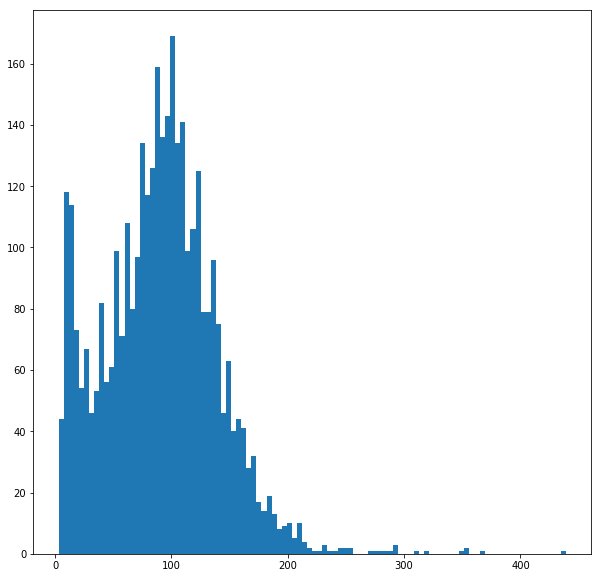

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.hist(length,bins=100)
plt.show()

In [46]:
# we can check the distribution:
dictionary_6yr.doc2bow(['tree'])

[(168, 1)]

In [45]:
lda_6yr.get_topic_terms(0)

[(168, 0.041298619004022638),
 (702, 0.016027947586980906),
 (140, 0.014891558170013213),
 (122, 0.013567037353829603),
 (620, 0.01350874076111285),
 (1497, 0.013417752449426791),
 (1595, 0.012311221867655382),
 (476, 0.011519817032102879),
 (401, 0.011227522127546789),
 (536, 0.01109819045270098)]